In [1]:
# Example 12.1 in Theodoridis
# Written by D.E. Brown

import numpy as np
import matplotlib.pyplot as plt

# Number and range of training samples
N = 500
x_min = 0
x_max = 2

# sigma eta and sigma theta 

variance_input = [0.05, 0.15]

# Variance for the noise, eta
variance_eta = variance_input[0]
std_eta = np.sqrt(variance_eta)

# Set random or true theta parameters for the ground truth equation
theta_true = np.array([0.2, -1., 0.9, 0.7, -0.2])
theta_distrbd = np.array([-0.004, -10.54, 0.465, 0.087, -0.093])
l = len(theta_true)

# Parameters for gaussian prior
variance_theta = variance_input[1]
sigma_theta = np.sqrt(variance_theta)
mu_theta_prior = theta_true # or mu_theta_prior = theta_distrbd

# Number of samples for prediction
Np = 20

# Generate training samples
x = np.linspace(x_min, x_max, N, endpoint=False)

# Generate random eta
eta = np.random.normal(0, std_eta, N)

# Measurement matrix
phi = np.array([np.ones_like(x), x, np.power(x,2), np.power(x,3), np.power(x,5)]).T

# Generate observations with eta
y = np.matmul(phi, theta_true) + eta

# Covariance matrix of Gaussian posterior
temp = np.power(variance_theta, -1) * np.eye(l) + np.matmul(phi.T, phi) * np.power(variance_eta, -1)
sigma_theta_pos = np.linalg.inv(temp)

# Posterior mean
mu_theta_pos =  mu_theta_prior + np.dot(np.power(variance_eta, -1) * (sigma_theta_pos), np.dot(phi.T, (y - np.dot(phi, mu_theta_prior))))

# Generate sample for predictions
x_pred = (x_max - x_min) * np.random.random(Np)

# Prediction measurement matrix
phi_pred = np.array([np.ones_like(x_pred), x_pred, np.power(x_pred,2), np.power(x_pred,3), np.power(x_pred,5)]).T

# Predicted mean
mu_y_pred = np.dot(phi_pred, mu_theta_pos)

# Predicted variance
temp = np.power(variance_theta, -1) * np.eye(l) + np.matmul(phi_pred.T, phi_pred) * np.power(variance_eta, -1)
sigma_theta_pos_pred = np.linalg.inv(temp)
sigma_y_pred = variance_eta + np.dot(np.dot(phi_pred, sigma_theta_pos_pred), phi_pred.T)

# Plot ground truth and results

x_true = np.linspace(x_min, x_max, 5000, endpoint=False) 
phi_true = np.array([np.ones_like(x_true), x_true, np.power(x_true,2), np.power(x_true,3), np.power(x_true,5)]).T 
y_true = np.dot(phi_true, theta_true)


plt.figure(figsize=(10,7))
plt.plot(x_true,y_true, 'blue')
plt.scatter(x_pred, mu_y_pred, marker='*', c='blue')
plt.errorbar(x_pred,mu_y_pred, yerr=np.diag(sigma_y_pred), linestyle='None', c='red', linewidth=1)
plt.show()

<Figure size 1000x700 with 1 Axes>

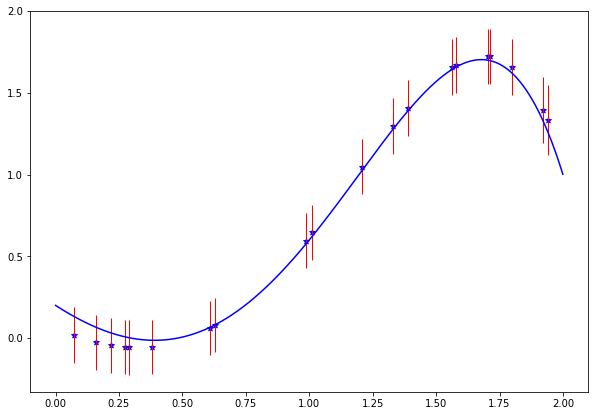

In [4]:
# Example 12.1 in Theodoridis
# Written by D.E. Brown

import numpy as np
import matplotlib.pyplot as plt

# Number and range of training samples
N = 500
x_min = 0
x_max = 2

# sigma eta and sigma theta 

variance_input = [0.15, 0.1]

# Variance for the noise, eta
variance_eta = variance_input[0]
std_eta = np.sqrt(variance_eta)

# Set random or true theta parameters for the ground truth equation
theta_true = np.array([0.2, -1., 0.9, 0.7, -0.2])
theta_distrbd = np.array([-0.004, -10.54, 0.465, 0.087, -0.093])
l = len(theta_true)

# Parameters for gaussian prior
variance_theta = variance_input[0]
sigma_theta = np.sqrt(variance_theta)
mu_theta_prior = theta_true # or mu_theta_prior = theta_distrbd

# Number of samples for prediction
Np = 20

# Generate training samples
x = np.linspace(x_min, x_max, N, endpoint=False)

# Generate random eta
eta = np.random.normal(0, std_eta, N)

# Measurement matrix
phi = np.array([np.ones_like(x), x, np.power(x,2), np.power(x,3), np.power(x,5)]).T

# Generate observations with eta
y = np.matmul(phi, theta_true) + eta

# Covariance matrix of Gaussian posterior
temp = np.power(variance_theta, -1) * np.eye(l) + np.matmul(phi.T, phi) * np.power(variance_eta, -1)
sigma_theta_pos = np.linalg.inv(temp)

# Posterior mean
mu_theta_pos =  mu_theta_prior + np.dot(np.power(variance_eta, -1) * (sigma_theta_pos), np.dot(phi.T, (y - np.dot(phi, mu_theta_prior))))

# Generate sample for predictions
x_pred = (x_max - x_min) * np.random.random(Np)

# Prediction measurement matrix
phi_pred = np.array([np.ones_like(x_pred), x_pred, np.power(x_pred,2), np.power(x_pred,3), np.power(x_pred,5)]).T

# Predicted mean
mu_y_pred = np.dot(phi_pred, mu_theta_pos)

# Predicted variance
temp = np.power(variance_theta, -1) * np.eye(l) + np.matmul(phi_pred.T, phi_pred) * np.power(variance_eta, -1)
sigma_theta_pos_pred = np.linalg.inv(temp)
sigma_y_pred = variance_eta + np.dot(np.dot(phi_pred, sigma_theta_pos_pred), phi_pred.T)

# Plot ground truth and results

x_true = np.linspace(x_min, x_max, 5000, endpoint=False) 
phi_true = np.array([np.ones_like(x_true), x_true, np.power(x_true,2), np.power(x_true,3), np.power(x_true,5)]).T 
y_true = np.dot(phi_true, theta_true)


plt.figure(figsize=(10,7))
plt.plot(x_true,y_true, 'blue')
plt.scatter(x_pred, mu_y_pred, marker='*', c='blue')
plt.errorbar(x_pred,mu_y_pred, yerr=np.diag(sigma_y_pred), linestyle='None', c='red', linewidth=1)
plt.show()